In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hespress/stories_faits-divers.csv
/kaggle/input/hespress/comments_marocains-du-monde.csv
/kaggle/input/hespress/stories_art-et-culture.csv
/kaggle/input/hespress/comments_regions.csv
/kaggle/input/hespress/comments_orbites.csv
/kaggle/input/hespress/stories_regions.csv
/kaggle/input/hespress/comments_art-et-culture.csv
/kaggle/input/hespress/stories_sport.csv
/kaggle/input/hespress/stories_medias.csv
/kaggle/input/hespress/comments_economie.csv
/kaggle/input/hespress/comments_medias.csv
/kaggle/input/hespress/stories_economie.csv
/kaggle/input/hespress/comments_sport.csv
/kaggle/input/hespress/comments_politique.csv
/kaggle/input/hespress/stories_tamazight.csv
/kaggle/input/hespress/stories_societe.csv
/kaggle/input/hespress/stories_orbites.csv
/kaggle/input/hespress/comments_societe.csv
/kaggle/input/hespress/stories_politique.csv
/kaggle/input/hespress/stories_marocains-du-monde.csv
/kaggle/input/hespress/comments_faits-divers.csv
/kaggle/input/hespress/comments_tamazig

In [2]:
#df = pd.read_csv("../input/hespress/stories_faits-divers.csv")
df = pd.concat(map(pd.read_csv, ["../input/hespress/stories_faits-divers.csv", "../input/hespress/stories_art-et-culture.csv"
                                 ,"../input/hespress/stories_regions.csv" ,"../input/hespress/stories_sport.csv"
                                ,"../input/hespress/stories_medias.csv" ,"../input/hespress/stories_economie.csv"
                                ,"../input/hespress/stories_tamazight.csv" , "../input/hespress/stories_societe.csv"
                                , "../input/hespress/stories_orbites.csv" , "../input/hespress/stories_politique.csv"
                                , "../input/hespress/stories_marocains-du-monde.csv" ]))

df.head()

,Unnamed: 0,id,title,date,author,story,topic
0,0,9d9ebd0204f811eb92ec646e69d991ea,"شهادة طبيب جراح ""تورط"" قنصلا بتر أصبع مسنة",الجمعة 02 أكتوبر 2020 - 20:08,هسبريس من الدار البيضاء,قررت الغرفة الجنائية بمحكمة الاستئناف بمدينة ا...,faits-divers
1,1,9e96ecc604f811eb836a646e69d991ea,"إحباط تهريب أكثر من طن من ""الحشيش"" بأكادير",الجمعة 02 أكتوبر 2020 - 19:37,رشيد بيجيكن من أكادير,تمكنت المصلحة الولائية للشرطة القضائية بمدينة ...,faits-divers
2,2,9fc1ec4204f811eb8619646e69d991ea,كمين أمن الصويرة يسقط شبكة هجرة غير نظامية,الجمعة 02 أكتوبر 2020 - 18:35,ابراهيم مغراوي من مراكش,أوقفت عناصر فرقة الشرطة القضائية بالمنطقة الإق...,faits-divers
3,3,a0a2fa9c04f811eb8580646e69d991ea,"""تلميذة زاكورة"" تتهم زوج أختها باستغلالها جنسيا",الجمعة 02 أكتوبر 2020 - 14:20,هسبريس من زاكورة,كشف مصدر أمني مسؤول أن التلميذة المتحدرة من جم...,faits-divers
4,4,a2d0124a04f811eba88f646e69d991ea,"""أحجار كريمة مزيفة"" تورط أشخاصا بمدينة أكادير",الجمعة 02 أكتوبر 2020 - 10:05,رشيد بيجيكن من أكادير,تمكنت عناصر المصلحة الولائية للشرطة القضائية ب...,faits-divers


In [3]:
df = df.sample(frac=1)
columns = ["title" , "story" ,"author", "topic"] 
data = df[columns]
data.head()

,title,story,author,topic
264,فلكي: عيد الأضحى بالمغرب والدول الإسلامية يوم ...,قال المعدل الفلكي عبد العزيز خربوش إنه من المر...,هسبريس من الرباط,orbites
985,توقف قطاع الطيران يُكلف الاقتصاد المغربي حوالي...,"قال الاتحاد الدولي للنقل الجوي ""إياتا"" إن توقف...",هسبريس - يوسف لخضر,economie
915,"""يوبرو"" و""انطلاقة"" يعدان بإدماج الشباب بالرياضة",منذ إطلاقها في نونبر 2019، تمت الإشادة بعلامة ...,هسبريس من الرباط,sport
261,"حصيلةُ ""كورونا"" تواصل الارتفاع بمليلية المحتلة",ارتفعت حصيلة الإصابات بفيروس كورونا المستجد بم...,عبد الكريم هرواش من الناظور,regions
705,ضيف هسبريس: الوزير محمد بنعبد القادر يناقش خطة...,ما فتئ المواطن المغربي يحلم بإدارة مواطنة تستج...,هسبريس من الرباط,medias


In [4]:
print("Duplicated values: " , data.duplicated().sum())

data.drop_duplicates(inplace=True)
data = data.dropna(axis=0)
print(data.info())

Duplicated values:  2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10998 entries, 264 to 259
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   10998 non-null  object
 1   story   10998 non-null  object
 2   author  10998 non-null  object
 3   topic   10998 non-null  object
dtypes: object(4)
memory usage: 429.6+ KB
None


/tmp/ipykernel_32/3122987058.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


In [5]:
data["topic"].value_counts()

orbites               1000
sport                 1000
medias                1000
faits-divers          1000
societe               1000
politique             1000
marocains-du-monde    1000
art-et-culture        1000
tamazight             1000
economie               999
regions                999
Name: topic, dtype: int64

# Number of examples per class

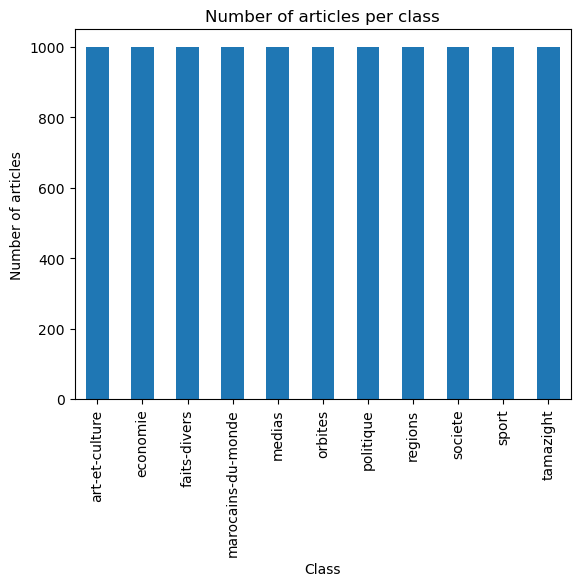

In [6]:
import matplotlib.pyplot as plt
class_counts = data.groupby("topic").size()

# Create a bar chart
class_counts.plot(kind="bar")
plt.title("Number of articles per class")
plt.xlabel("Class")
plt.ylabel("Number of articles")
plt.show()

#  Top frequent n-grams generally and per class

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


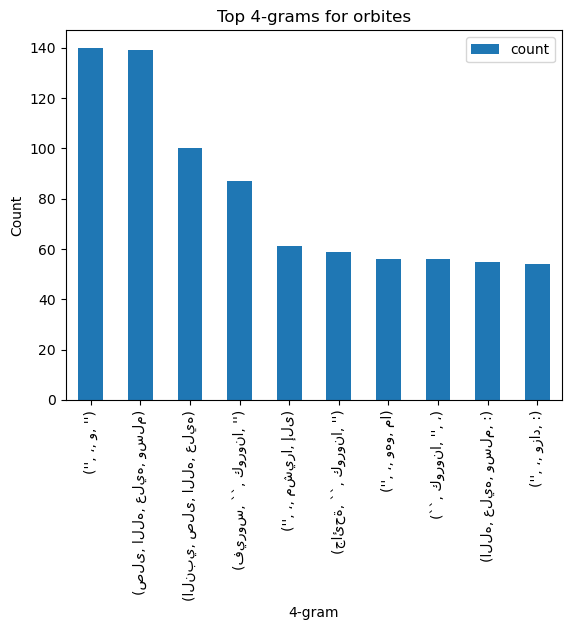

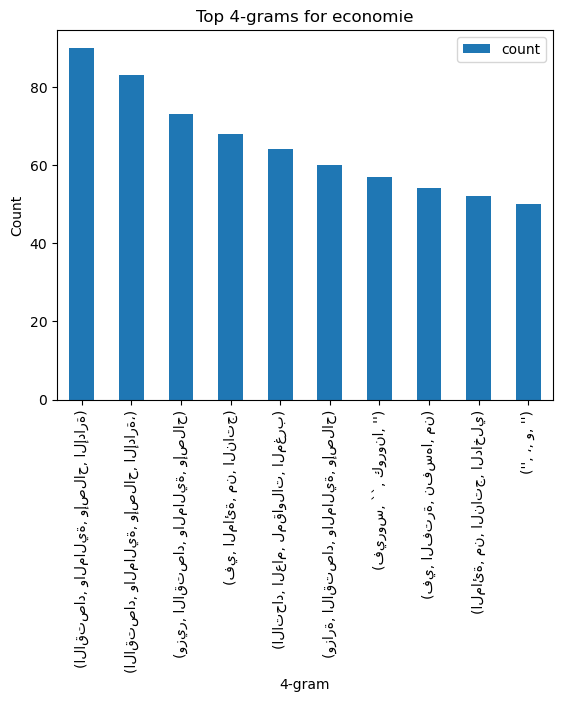

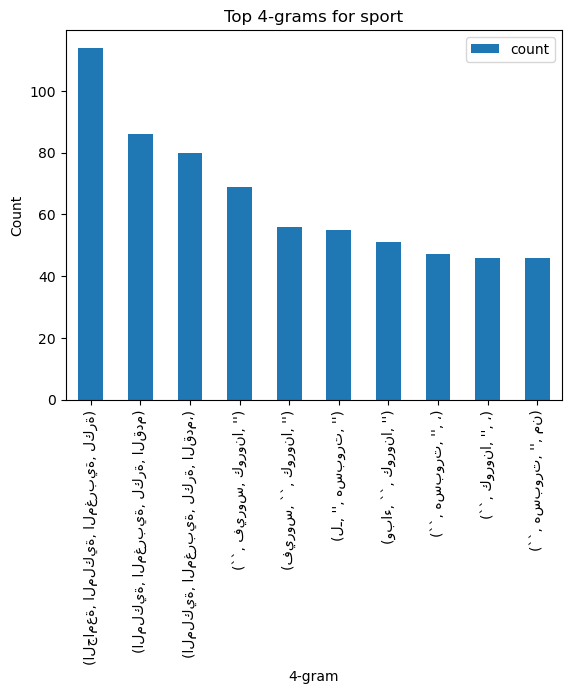

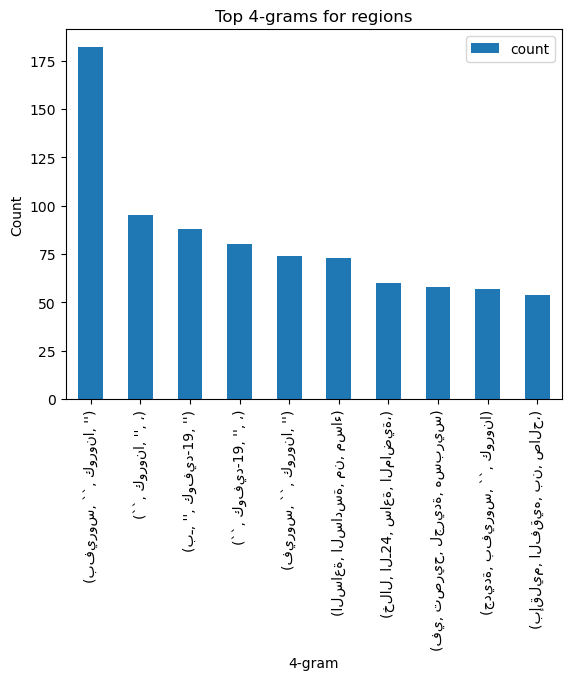

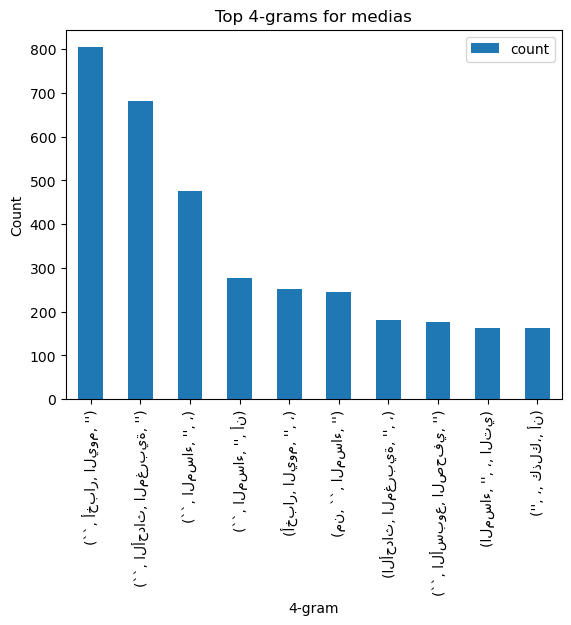

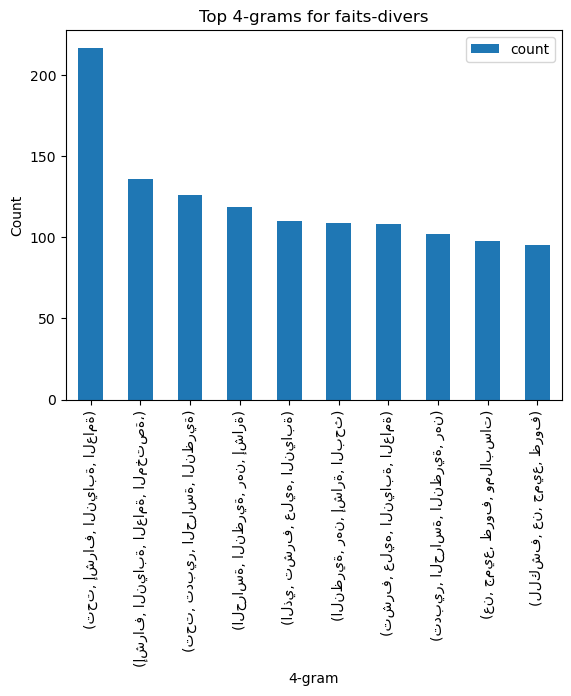

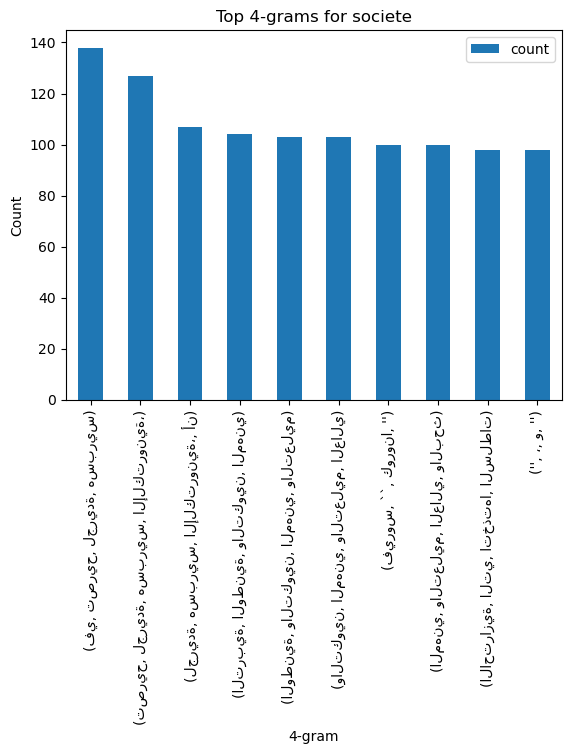

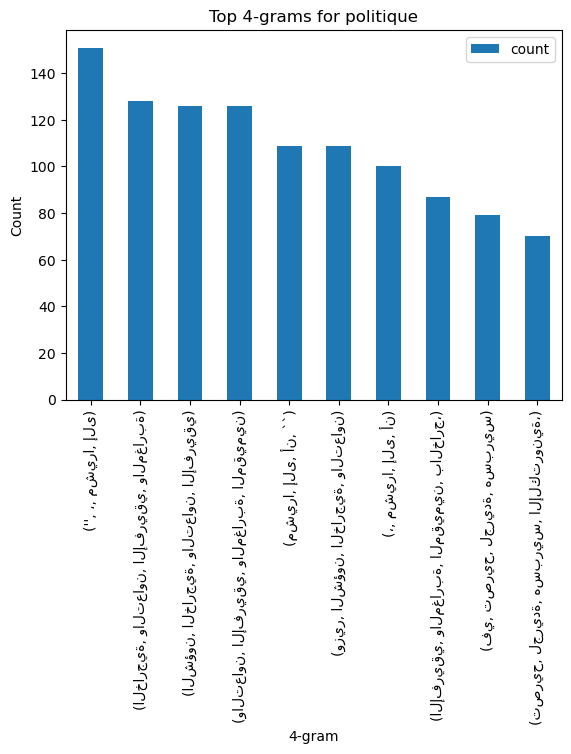

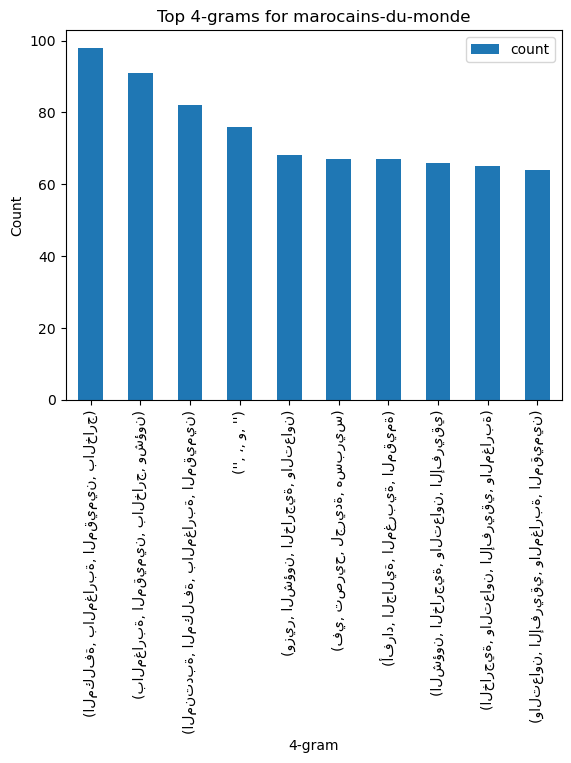

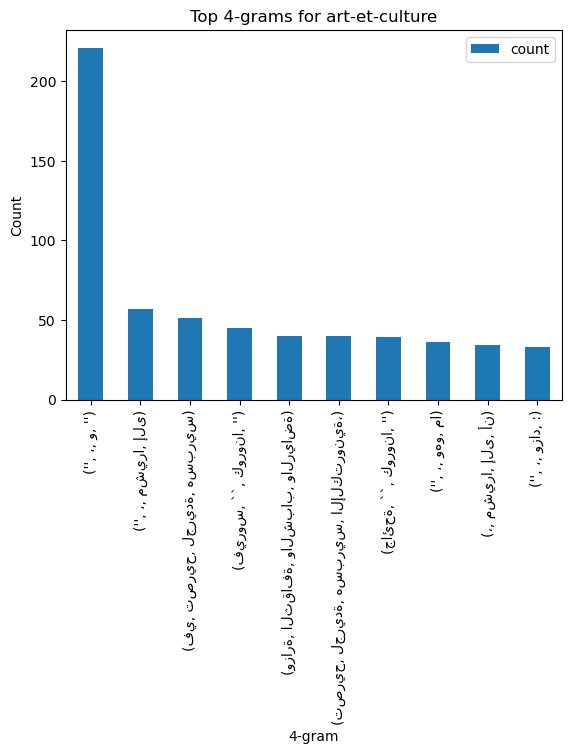

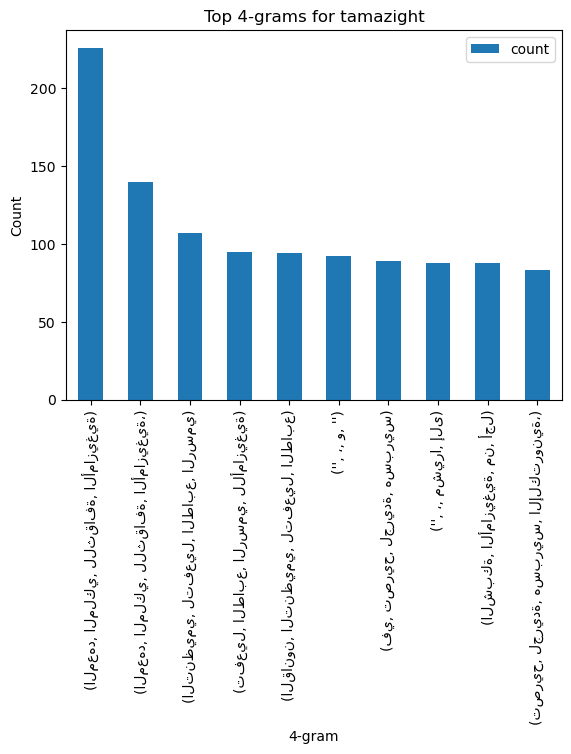

In [7]:
import nltk
from collections import Counter
def get_top_ngrams(category, n):
    # Get the articles for the category
    category_articles = df[df["topic"] == category]["story"].tolist()
    # Tokenize the text into words
    category_words = [nltk.word_tokenize(article) for article in category_articles]
    # Create n-grams from the words
    category_ngrams = [list(nltk.ngrams(words, n)) for words in category_words]
    # Flatten the list of n-grams
    all_ngrams = [gram for article in category_ngrams for gram in article]
    # Get the most frequent n-grams
    top_ngrams = Counter(all_ngrams).most_common(10)
    # Create a bar chart for the top n-grams
    top_ngrams_df = pd.DataFrame(top_ngrams, columns=[f"{n}-gram", "count"])
    top_ngrams_df.plot(kind="bar", x=f"{n}-gram", y="count")
    plt.title(f"Top {n}-grams for {category}")
    plt.xlabel(f"{n}-gram")
    plt.ylabel("Count")
    plt.show()

# Get the top 4-grams for each category
categories = df["topic"].unique().tolist()
for category in categories:
    get_top_ngrams(category, 4)

In [8]:
articles_text = data["story"].tolist()

# Tokenize the text into words
articles_words = [nltk.word_tokenize(article) for article in articles_text]

# Create 4-grams from the words
articles_4grams = [list(nltk.ngrams(words, 4)) for words in articles_words]

# Flatten the list of 4-grams
all_4grams = [gram for article in articles_4grams for gram in article]

# Get the most frequent 4-grams overall
top_10_4grams = Counter(all_4grams).most_common(10)
print("Top 10 4-grams overall:")
print(top_10_4grams)



Top 10 4-grams overall:
[(("''", '،', 'و', "''"), 829), (('``', 'أخبار', 'اليوم', "''"), 808), (('``', 'الأحداث', 'المغربية', "''"), 684), (('فيروس', '``', 'كورونا', "''"), 642), (('في', 'تصريح', 'لجريدة', 'هسبريس'), 619), (("''", '،', 'مشيرا', 'إلى'), 598), (('تصريح', 'لجريدة', 'هسبريس', 'الإلكترونية،'), 529), (('``', 'كورونا', "''", '،'), 482), (('``', 'المساء', "''", '،'), 476), (('لجريدة', 'هسبريس', 'الإلكترونية،', 'أن'), 381)]


# Lengths of examples in words and letters

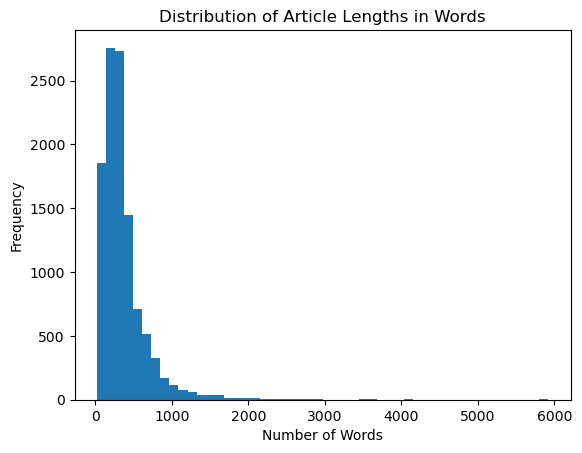

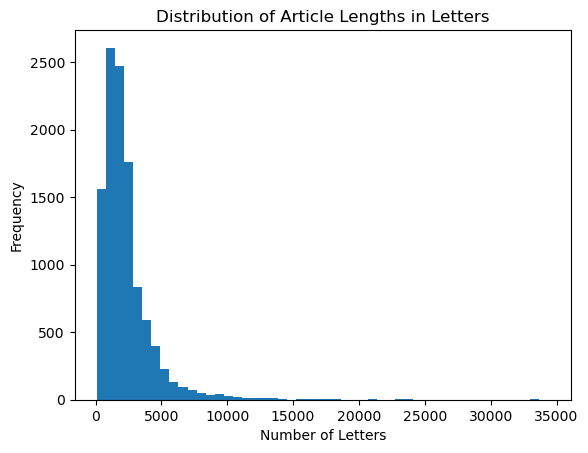

In [9]:
article_lengths_words = data["story"].apply(lambda x: len(x.split()))

# Get the length of each article in letters
article_lengths_letters = data["story"].apply(lambda x: len(x))

# Create a histogram for the length of articles in words
plt.hist(article_lengths_words, bins=50)
plt.title("Distribution of Article Lengths in Words")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# Create a histogram for the length of articles in letters
plt.hist(article_lengths_letters, bins=50)
plt.title("Distribution of Article Lengths in Letters")
plt.xlabel("Number of Letters")
plt.ylabel("Frequency")
plt.show()

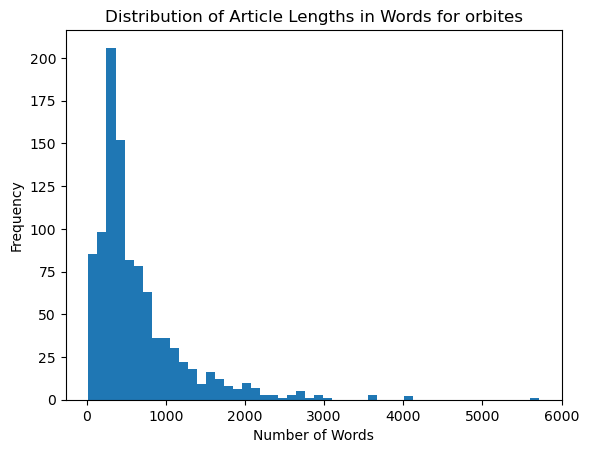

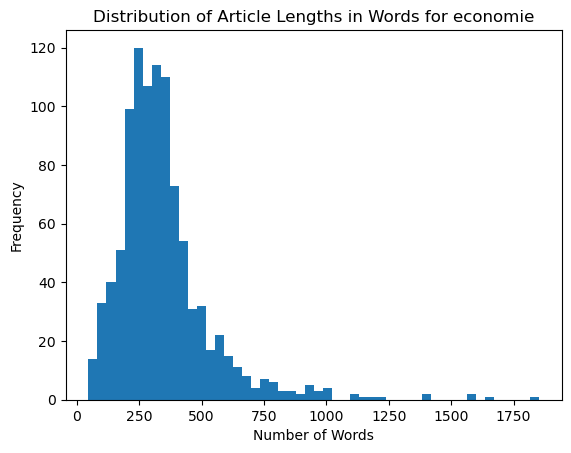

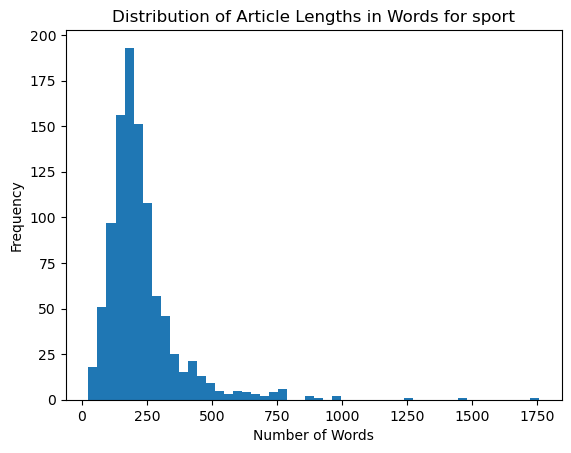

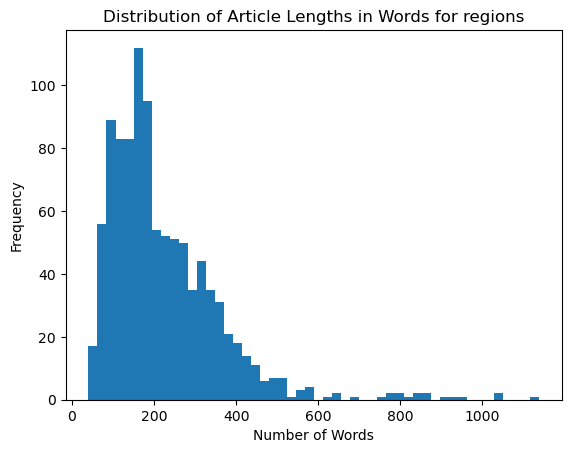

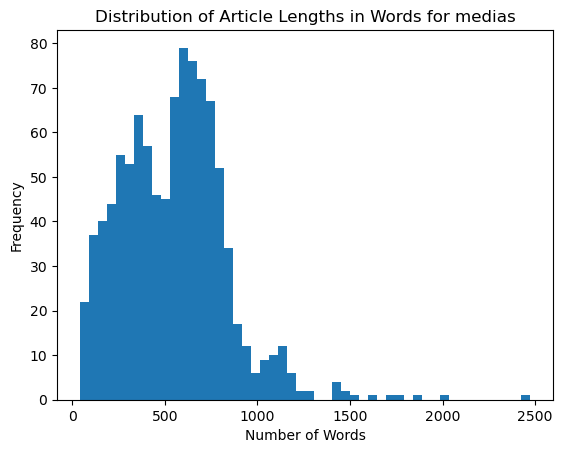

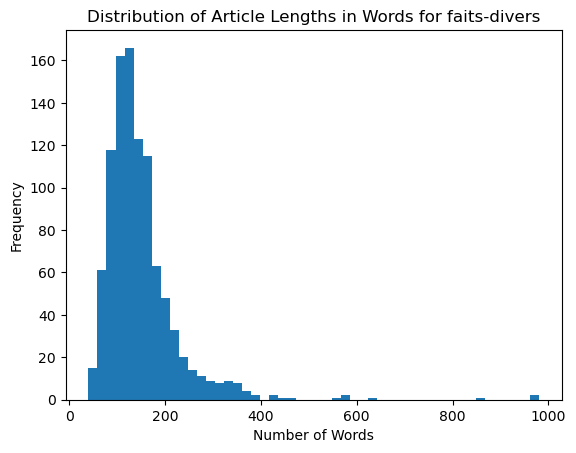

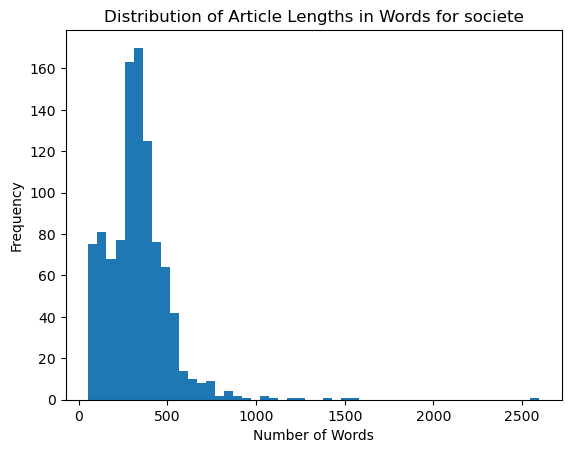

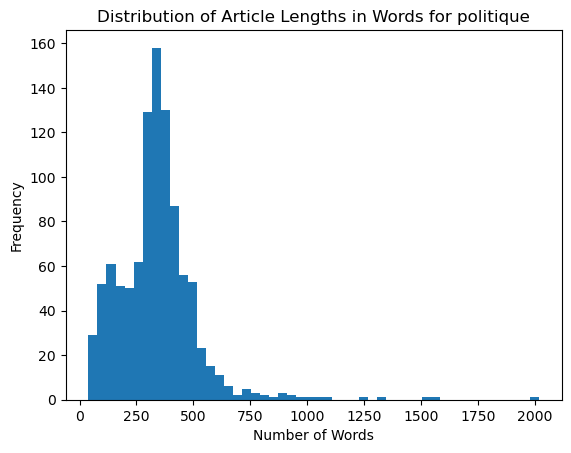

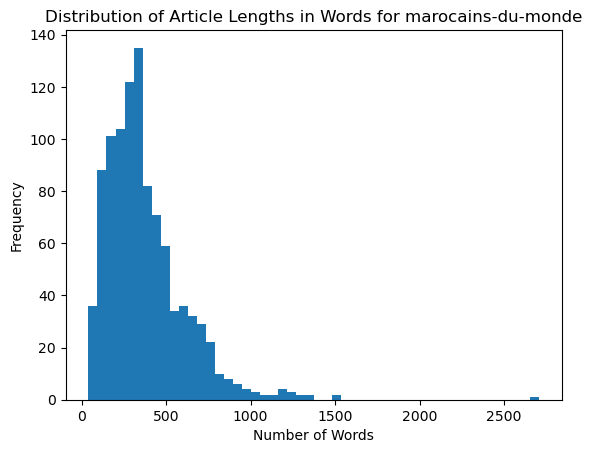

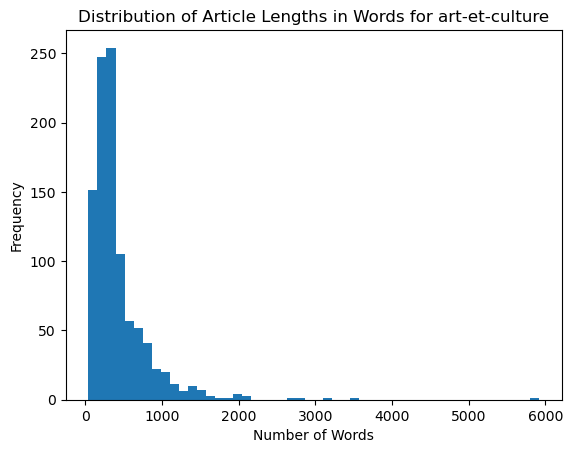

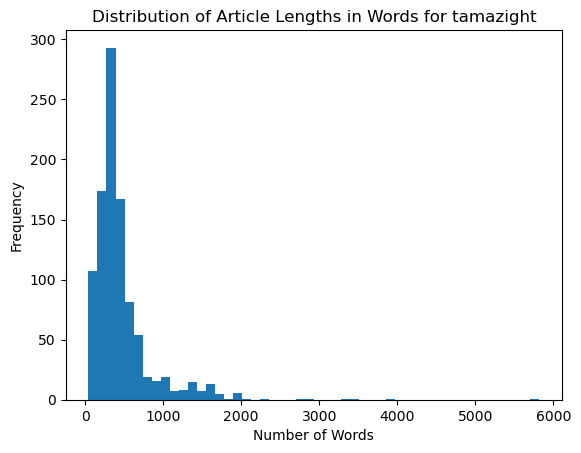

In [10]:
article_lengths_by_class = {}
for category in data["topic"].unique():
    category_articles = data[data["topic"] == category]["story"]
    category_article_lengths = category_articles.apply(lambda x: len(x.split()))
    article_lengths_by_class[category] = category_article_lengths

# Create a histogram for the length of articles in words for each class
for category in article_lengths_by_class:
    plt.hist(article_lengths_by_class[category], bins=50)
    plt.title(f"Distribution of Article Lengths in Words for {category}")
    plt.xlabel("Number of Words")
    plt.ylabel("Frequency")
    plt.show()

# Data cleaning

In [11]:
#Text cleaning
import re, string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.isri import ISRIStemmer
import pyarabic.araby as araby
from textblob import TextBlob

#Data preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
stops = set(stopwords.words("arabic"))
stop_word_comp = {"،","آض","آمينَ","آه","آهاً","آي","أ","أب","أجل","أجمع","أخ","أخذ","أصبح","أضحى","أقبل","أقل","أكثر","ألا","أم","أما","أمامك","أمامكَ","أمسى","أمّا","أن","أنا","أنت","أنتم","أنتما","أنتن","أنتِ","أنشأ","أنّى","أو","أوشك","أولئك","أولئكم","أولاء","أولالك","أوّهْ","أي","أيا","أين","أينما","أيّ","أَنَّ","أََيُّ","أُفٍّ","إذ","إذا","إذاً","إذما","إذن","إلى","إليكم","إليكما","إليكنّ","إليكَ","إلَيْكَ","إلّا","إمّا","إن","إنّما","إي","إياك","إياكم","إياكما","إياكن","إيانا","إياه","إياها","إياهم","إياهما","إياهن","إياي","إيهٍ","إِنَّ","ا","ابتدأ","اثر","اجل","احد","اخرى","اخلولق","اذا","اربعة","ارتدّ","استحال","اطار","اعادة","اعلنت","اف","اكثر","اكد","الألاء","الألى","الا","الاخيرة","الان","الاول","الاولى","التى","التي","الثاني","الثانية","الذاتي","الذى","الذي","الذين","السابق","الف","اللائي","اللاتي","اللتان","اللتيا","اللتين","اللذان","اللذين","اللواتي","الماضي","المقبل","الوقت","الى","اليوم","اما","امام","امس","ان","انبرى","انقلب","انه","انها","او","اول","اي","ايار","ايام","ايضا","ب","بات","باسم","بان","بخٍ","برس","بسبب","بسّ","بشكل","بضع","بطآن","بعد","بعض","بك","بكم","بكما","بكن","بل","بلى","بما","بماذا","بمن","بن","بنا","به","بها","بي","بيد","بين","بَسْ","بَلْهَ","بِئْسَ","تانِ","تانِك","تبدّل","تجاه","تحوّل","تلقاء","تلك","تلكم","تلكما","تم","تينك","تَيْنِ","تِه","تِي","ثلاثة","ثم","ثمّ","ثمّة","ثُمَّ","جعل","جلل","جميع","جير","حار","حاشا","حاليا","حاي","حتى","حرى","حسب","حم","حوالى","حول","حيث","حيثما","حين","حيَّ","حَبَّذَا","حَتَّى","حَذارِ","خلا","خلال","دون","دونك","ذا","ذات","ذاك","ذانك","ذانِ","ذلك","ذلكم","ذلكما","ذلكن","ذو","ذوا","ذواتا","ذواتي","ذيت","ذينك","ذَيْنِ","ذِه","ذِي","راح","رجع","رويدك","ريث","رُبَّ","زيارة","سبحان","سرعان","سنة","سنوات","سوف","سوى","سَاءَ","سَاءَمَا","شبه","شخصا","شرع","شَتَّانَ","صار","صباح","صفر","صهٍ","صهْ","ضد","ضمن","طاق","طالما","طفق","طَق","ظلّ","عاد","عام","عاما","عامة","عدا","عدة","عدد","عدم","عسى","عشر","عشرة","علق","على","عليك","عليه","عليها","علًّ","عن","عند","عندما","عوض","عين","عَدَسْ","عَمَّا","غدا","غير","ـ","ف","فان","فلان","فو","فى","في","فيم","فيما","فيه","فيها","قال","قام","قبل","قد","قطّ","قلما","قوة","كأنّما","كأين","كأيّ","كأيّن","كاد","كان","كانت","كذا","كذلك","كرب","كل","كلا","كلاهما","كلتا","كلم","كليكما","كليهما","كلّما","كلَّا","كم","كما","كي","كيت","كيف","كيفما","كَأَنَّ","كِخ","لئن","لا","لات","لاسيما","لدن","لدى","لعمر","لقاء","لك","لكم","لكما","لكن","لكنَّما","لكي","لكيلا","للامم","لم","لما","لمّا","لن","لنا","له","لها","لو","لوكالة","لولا","لوما","لي","لَسْتَ","لَسْتُ","لَسْتُم","لَسْتُمَا","لَسْتُنَّ","لَسْتِ","لَسْنَ","لَعَلَّ","لَكِنَّ","لَيْتَ","لَيْسَ","لَيْسَا","لَيْسَتَا","لَيْسَتْ","لَيْسُوا","لَِسْنَا","ما","ماانفك","مابرح","مادام","ماذا","مازال","مافتئ","مايو","متى","مثل","مذ","مساء","مع","معاذ","مقابل","مكانكم","مكانكما","مكانكنّ","مكانَك","مليار","مليون","مما","ممن","من","منذ","منها","مه","مهما","مَنْ","مِن","نحن","نحو","نعم","نفس","نفسه","نهاية","نَخْ","نِعِمّا","نِعْمَ","ها","هاؤم","هاكَ","هاهنا","هبّ","هذا","هذه","هكذا","هل","هلمَّ","هلّا","هم","هما","هن","هنا","هناك","هنالك","هو","هي","هيا","هيت","هيّا","هَؤلاء","هَاتانِ","هَاتَيْنِ","هَاتِه","هَاتِي","هَجْ","هَذا","هَذانِ","هَذَيْنِ","هَذِه","هَذِي","هَيْهَاتَ","و","و6","وا","واحد","واضاف","واضافت","واكد","وان","واهاً","واوضح","وراءَك","وفي","وقال","وقالت","وقد","وقف","وكان","وكانت","ولا","ولم","ومن","مَن","وهو","وهي","ويكأنّ","وَيْ","وُشْكَانََ","يكون","يمكن","يوم","كان","ّأيّان"}

st = ISRIStemmer()
def stemNLTK(text):
    # tokenize
    zen = TextBlob(text)
    words = zen.words
    cleaned = list()
    for w in words:
        ty = st.stem(w)
        cleaned.append(ty)
    return " ".join(cleaned)


def normalizeArabic(text):
    text = text.strip()
    text = re.sub("[إأٱآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    noise = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    text = re.sub(noise, '', text)
    text = re.sub(r'(.)\1+', r"\1\1", text) # Remove longation
    return araby.strip_tashkeel(text)


def remove_stop_words(text):
    zen = TextBlob(text)
    words = zen.words
    return " ".join([w for w in words if not w in stops and not w in stop_word_comp and len(w) >= 2])



def clean_text(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)  # remove punctuation
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    ## Convert text to lowercases
    text = text.lower()
    ## Remove stop words
    text = remove_stop_words(text)
    ## Remove numbers
    text = re.sub("\d+", " ", text)
    ## Remove Tashkeel
    #text = normalizeArabic(text)
    #text = re.sub('\W+', ' ', text)
    text = re.sub('[A-Za-z]+',' ',text)
    text = re.sub(r'\\u[A-Za-z0-9\\]+',' ',text)
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    #Stemming
    text = stemNLTK(text)
    return text

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
data['story'] = data['story'].apply(lambda x:clean_text(x))

# Label encoder

In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data.insert(len(data.columns), "encoded_labels", label_encoder.fit_transform(data['topic']))
print(label_encoder.classes_)
data.head()

['art-et-culture' 'economie' 'faits-divers' 'marocains-du-monde' 'medias'
 'orbites' 'politique' 'regions' 'societe' 'sport' 'tamazight']


,title,story,author,topic,encoded_labels
264,فلكي: عيد الأضحى بالمغرب والدول الإسلامية يوم ...,عدل فلك عبد عزز خربوش رقب فتح حجة ربعاء ليز جر...,هسبريس من الرباط,orbites,5
985,توقف قطاع الطيران يُكلف الاقتصاد المغربي حوالي...,تحد دول نقل جوي يتا وقف عمل طير جرء احترازية ل...,هسبريس - يوسف لخضر,economie,1
915,"""يوبرو"" و""انطلاقة"" يعدان بإدماج الشباب بالرياضة",طلق نبر تمت شدة علم دان ميلكشايك غنة برو عشق ر...,هسبريس من الرباط,sport,9
261,"حصيلةُ ""كورونا"" تواصل الارتفاع بمليلية المحتلة",رفع حصل اصب يرس كورو سجد بمد ليل حتل حلة رصد ص...,عبد الكريم هرواش من الناظور,regions,7
705,ضيف هسبريس: الوزير محمد بنعبد القادر يناقش خطة...,فتئ وطن غرب حلم إدر وطن تجب طلب قدم خدم جود طل...,هسبريس من الرباط,medias,4


# Split data (80 - 20)

In [14]:
from sklearn.model_selection import train_test_split
X = data["title"]
y = data["encoded_labels"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Logistic regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer() 
LR_Classifier = LogisticRegression()

lr_pipe=make_pipeline(vectorizer,LR_Classifier)
lr_pipe.fit(X_train,y_train)
lr_y_pred=lr_pipe.predict(X_test)

lr_y_pred[1]

7

In [16]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import accuracy_score,confusion_matrix

print("Accuracy score: " , accuracy_score(y_test,lr_y_pred))
print("Recall score: " ,recall_score(y_test,lr_y_pred, average='micro'))
print("Precision score: " ,precision_score(y_test,lr_y_pred , average='micro'))
print("F1 score: " ,f1_score(y_test,lr_y_pred , average='micro'))

Accuracy score:  0.7463636363636363
Recall score:  0.7463636363636363
Precision score:  0.7463636363636363
F1 score:  0.7463636363636363


# XGBoosting

In [17]:
from xgboost import XGBClassifier

gb = XGBClassifier()
vectorizer=TfidfVectorizer() 
gb_pipe=make_pipeline(vectorizer,gb)
gb_pipe.fit(X_train,y_train)
gb_y_pred=gb_pipe.predict(X_test)

gb_y_pred[1]


7

In [18]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import accuracy_score,confusion_matrix

print("Accuracy score: " , accuracy_score(y_test,gb_y_pred))
print("Recall score: " ,recall_score(y_test,gb_y_pred, average='micro'))
print("Precision score: " ,precision_score(y_test,gb_y_pred , average='micro'))
print("F1 score: " ,f1_score(y_test,gb_y_pred , average='micro'))

Accuracy score:  0.6736363636363636
Recall score:  0.6736363636363636
Precision score:  0.6736363636363636
F1 score:  0.6736363636363636


# Accuracy for Each model

In [28]:
for i  in range(11):
    class_0 = data[data["encoded_labels"] == i]
    e = class_0["topic"][0]
    print(f"======= Class {e} =========== ")
    lr_y_pred=lr_pipe.predict(class_0["story"])
    print("Accuracy score: " , accuracy_score(class_0["encoded_labels"],lr_y_pred))
    print("Recall score: " ,recall_score(class_0["encoded_labels"],lr_y_pred, average='micro'))
    print("Precision score: " ,precision_score(class_0["encoded_labels"],lr_y_pred , average='micro'))
    print("F1 score: " ,f1_score(class_0["encoded_labels"],lr_y_pred , average='micro'))




======= Class art-et-culture =========== 
Accuracy score:  0.791
Recall score:  0.791
Precision score:  0.791
F1 score:  0.791
======= Class economie =========== 
Accuracy score:  0.5675675675675675
Recall score:  0.5675675675675675
Precision score:  0.5675675675675675
F1 score:  0.5675675675675675
======= Class faits-divers =========== 
Accuracy score:  0.723
Recall score:  0.723
Precision score:  0.723
F1 score:  0.723
======= Class marocains-du-monde =========== 
Accuracy score:  0.0
Recall score:  0.0
Precision score:  0.0
F1 score:  0.0
======= Class medias =========== 
Accuracy score:  0.012
Recall score:  0.012
Precision score:  0.012
F1 score:  0.012
======= Class orbites =========== 
Accuracy score:  0.549
Recall score:  0.549
Precision score:  0.549
F1 score:  0.549
======= Class politique =========== 
Accuracy score:  0.446
Recall score:  0.446
Precision score:  0.446
F1 score:  0.446
======= Class regions =========== 
Accuracy score:  0.2992992992992993
Recall score:  0.299